In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [60]:
def draw_missing_data_table(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [61]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None, n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores=learning_curve(estimator,X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores, axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1, color="g")
    plt.plot(train_sizes,train_scores_mean,'o-', color="r",label="Training Score")
    plt.plot(train_sizes,test_scores_mean, 'o-',color="g",label="Validation Score")
    plt.legend(loc="best")
    return plt

In [62]:
def plot_validation_curve(estimator, title, X, y,param_name, param_range, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1,1.0,5)):
    train_scores, test_scores=validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean=np.mean(train_scores, axis=1)
    train_std=np.std(train_scores, axis=1)
    test_mean=np.mean(test_scores, axis=1)
    test_std=np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r',marker='o', markersize=5, label='Training Score')
    plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s',markersize=5, label='ValidationScore')
    plt.fill_between(param_range,test_mean+test_std, test_mean-test_std, alpha=0.15, color='g')
    plt.grid()
    plt.xscale('log')
    plt.legend(loc='best')
    plt.xlabel('Parameter')
    plt.ylabel('Score')
    plt.ylim(ylim)

In [63]:
df=pd.read_csv('C:\\Users\pragy\Desktop\downloads\\titanic\\train.csv')
df_raw=df.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
draw_missing_data_table(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [66]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [67]:
value=1000
df['Age'].fillna(1000,inplace=True)
df['Age'].max()

1000.0

In [68]:
df.drop(df[pd.isnull(df['Embarked'])].index,inplace=True)
df[pd.isnull(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [69]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [70]:
df.drop('PassengerId',axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [71]:
df['Sex']=pd.Categorical(df['Sex'])
df['Embarked']=pd.Categorical(df['Embarked'])

In [72]:
df['FamilySize']=df['SibSp']+df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [73]:
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [74]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [75]:
df=pd.get_dummies(df, drop_first=True)
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [76]:
 df.drop(['Sex_female','Embarked_C'],axis=1,inplace=True)

ValueError: labels ['Sex_female' 'Embarked_C'] not contained in axis

In [77]:
X=df[df.loc[:,df.columns!='Survived'].columns]
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [78]:
print('Inputs: \n',X_train.head())
print('Outputs: \n', y_train.head())


Inputs: 
      Pclass     Age      Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S
121       3  1000.0    8.0500           0         1           0           1
687       3    19.0   10.1708           0         1           0           1
790       3  1000.0    7.7500           0         1           1           0
837       3  1000.0    8.0500           0         1           0           1
659       1    58.0  113.2750           2         1           0           0
Outputs: 
 121    0
687    0
790    0
837    0
659    0
Name: Survived, dtype: int64


In [79]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
scores=cross_val_score(logreg, X_train, y_train, cv=10)
print('CV Accuracy: %.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

CV Accuracy: 0.786 +/- 0.026


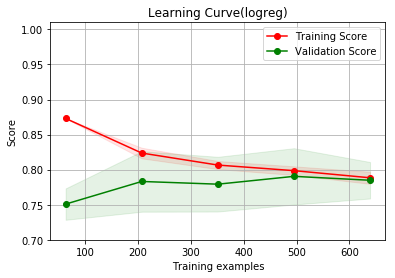

In [81]:
title='Learning Curve(logreg)'
cv=10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

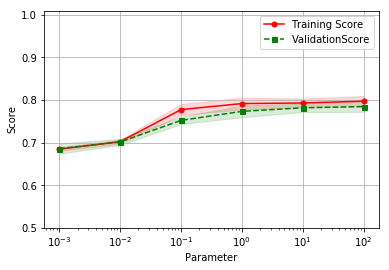

In [82]:
title='Validation Curve(logreg)'
param_name='C'
param_range=[0.001,0.01,0.1,1.0,10.0,100.0]
cv=10
plot_validation_curve(estimator=logreg, title=title, X=X_train, y=y_train, param_name=param_name, ylim=(0.5,1.01), param_range=param_range);

In [83]:
#chubby approach
df=df_raw.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df['FamilySize']=df['SibSp']+df['Parch']
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [85]:
df_raw['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [86]:
df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


In [87]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

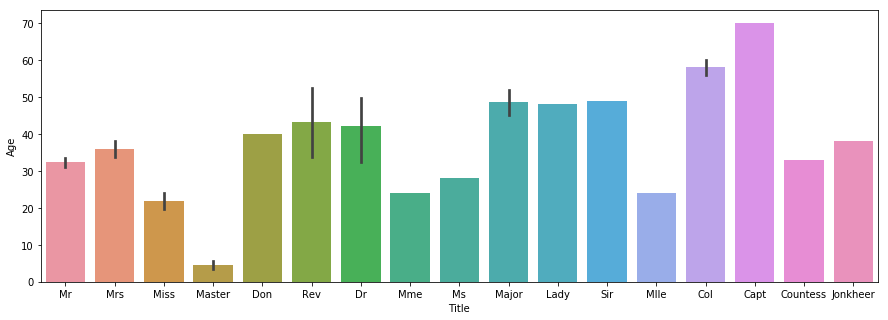

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Title'], y=df_raw['Age']);

In [89]:
df_raw['Title']=df['Title']
means=df_raw.groupby('Title')['Age'].mean()
means.head()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Name: Age, dtype: float64

In [90]:
map_means=means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [91]:
idx_nan_age=df.loc[np.isnan(df['Age'])].index
df.loc[idx_nan_age,'Age'].loc[idx_nan_age]=df['Title'].loc[idx_nan_age].map(map_means)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


In [92]:
df['Imputed']=0
df.at[idx_nan_age.values,'Imputed']=1
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Imputed
0,1,0,3,male,22.0,7.2500,S,1,Mr,0
1,2,1,1,female,38.0,71.2833,C,1,Mrs,0
2,3,1,3,female,26.0,7.9250,S,0,Miss,0
3,4,1,1,female,35.0,53.1000,S,1,Mrs,0
4,5,0,3,male,35.0,8.0500,S,0,Mr,0


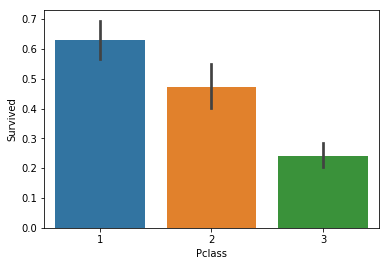

In [93]:
sns.barplot(df['Pclass'],df['Survived']);

In [94]:
df.groupby(['Title'])['PassengerId'].count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [95]:
titles_dict={'Capt':'Other', 
            'Major': 'Other',
             'Jonkheer':'Other',
             'Don':'Other',
             'Sir':'Other',
             'Dr':'Other',
             'Rev':'Other',
             'Countess':'Other',
             'Dona':'Other',
             'Mme':'Mrs',
             'Mlle':'Miss',
             'Ms':'Miss',
             'Mr':'Mr',
             'Mrs':'Mrs',
             'Miss':'Miss',
             'Master':'Master',
             'Lady':'Other'
            }

In [96]:
df['Title']=df['Title'].map(titles_dict)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [97]:
df['Title']=pd.Categorical(df['Title'])
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
Fare            float64
Embarked         object
FamilySize        int64
Title          category
Imputed           int64
dtype: object

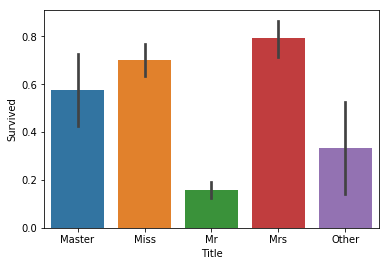

In [98]:
sns.barplot(x='Title',y='Survived',data=df);

In [99]:
df['Sex']=pd.Categorical(df['Sex'])
df['Age']=pd.cut(df['Age'], bins=[0,12,50,200], labels=['Child','Adult','Elder'])

In [100]:
df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Fare,FamilySize,Imputed
Embarked,,,,,,
C,445.357143,0.553571,1.886905,59.954144,0.750000,0.226190
Q,417.896104,0.389610,2.909091,13.276030,0.597403,0.636364
S,449.527950,0.336957,2.350932,27.079812,0.984472,0.139752


In [101]:
df.drop('PassengerId', axis=1, inplace=True)
df.dtypes

Survived         int64
Pclass           int64
Sex           category
Age           category
Fare           float64
Embarked        object
FamilySize       int64
Title         category
Imputed          int64
dtype: object

In [102]:
df['Embarked']=pd.Categorical(df['Embarked'])
df.dtypes

Survived         int64
Pclass           int64
Sex           category
Age           category
Fare           float64
Embarked      category
FamilySize       int64
Title         category
Imputed          int64
dtype: object

In [103]:
df=pd.get_dummies(df)
df.head()

,Survived,Pclass,Fare,FamilySize,Imputed,Sex_female,Sex_male,Age_Child,Age_Adult,Age_Elder,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,7.2500,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
1,1,1,71.2833,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0
2,1,3,7.9250,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
3,1,1,53.1000,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0,3,8.0500,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0


In [104]:
df.drop(['Sex_female','Age_Adult','Embarked_C','Title_Master'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Fare,FamilySize,Imputed,Sex_male,Age_Child,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,7.2500,1,0,1,0,0,0,1,0,1,0,0
1,1,1,71.2833,1,0,0,0,0,0,0,0,0,1,0
2,1,3,7.9250,0,0,0,0,0,0,1,1,0,0,0
3,1,1,53.1000,1,0,0,0,0,0,1,0,0,1,0
4,0,3,8.0500,0,0,1,0,0,0,1,0,1,0,0


In [106]:
from sklearn.model_selection import train_test_split
X=df[df.loc[:,df.columns!='Survived'].columns]
y=df['Survived']
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=.2, random_state=0)

In [117]:
from scipy.stats import boxcox
X_train_transformed=X_train.copy()
X_train_transformed['Fare']=boxcox(X_train_transformed['Fare']+1)[0]
X_test_transformed=X_test.copy()
X_test_transformed['Fare']=boxcox(X_test_transformed['Fare']+1)[0]

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_transformed_scaled=scaler.fit_transform(X_train_transformed)
X_test_transformed_scaled=scaler.transform(X_test_transformed)

In [119]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2).fit(X_train_transformed)
X_train_poly=poly.transform(X_train_transformed_scaled)
X_test_poly=poly.transform(X_test_transformed_scaled)

In [120]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
logreg=LogisticRegression(C=1)
logreg.fit(X_train, y_train)
scores=cross_val_score(logreg, X_train, y_train, cv=10)
print('CV Accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score=np.mean(scores)
for i in range(1, X_train_poly.shape[1]+1, 1):
    select=SelectKBest(score_func=chi2, k=i)
    select.fit(X_train_poly, y_train)
    X_train_poly_selected=select.transform(X_train_poly)
    logreg.fit(X_train_poly_selected, y_train)
    scores=cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
    print('CV Accuracy (number of features= %i): %.3f +/- %.3f' %(i, np.mean(scores), np.std(scores)))
    if(np.mean(scores)>highest_score):
        highest_score=np.mean(scores)
        std=np.std(scores)
        k_features_highest_score=i
    elif np.mean(scores)==highest_score:
        if np.std(scores)< std:
            highest_score=np.mean(scores)
            std=np.std(scores)
            k_features_highest_score=i
print('Number of features with highest score: %i' % k_features_highest_score)

CV Accuracy (original): 0.823 +/- 0.031
CV Accuracy (number of features= 1): 0.789 +/- 0.049
CV Accuracy (number of features= 2): 0.789 +/- 0.049
CV Accuracy (number of features= 3): 0.789 +/- 0.049
CV Accuracy (number of features= 4): 0.789 +/- 0.049
CV Accuracy (number of features= 5): 0.792 +/- 0.051
CV Accuracy (number of features= 6): 0.792 +/- 0.051
CV Accuracy (number of features= 7): 0.798 +/- 0.042
CV Accuracy (number of features= 8): 0.798 +/- 0.042
CV Accuracy (number of features= 9): 0.798 +/- 0.042
CV Accuracy (number of features= 10): 0.798 +/- 0.042
CV Accuracy (number of features= 11): 0.798 +/- 0.042
CV Accuracy (number of features= 12): 0.798 +/- 0.042
CV Accuracy (number of features= 13): 0.798 +/- 0.042
CV Accuracy (number of features= 14): 0.798 +/- 0.042
CV Accuracy (number of features= 15): 0.798 +/- 0.042
CV Accuracy (number of features= 16): 0.798 +/- 0.042
CV Accuracy (number of features= 17): 0.794 +/- 0.048
CV Accuracy (number of features= 18): 0.792 +/- 0.0

In [123]:
select=SelectKBest(score_func=chi2, k=k_features_highest_score)
select.fit(X_train_poly, y_train)
X_train_poly_selected=select.transform(X_train_poly)
logreg=LogisticRegression(C=1)
logreg.fit(X_train_poly_selected, y_train)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
scores=cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
print('CV Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV Accuracy: 0.834 +/- 0.037


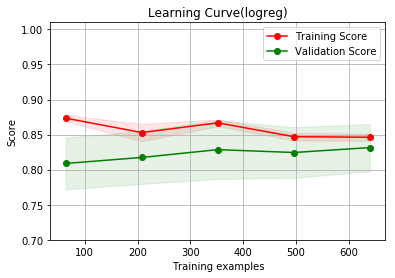

In [125]:
title='Learning Curve(logreg)'
cv=10
plot_learning_curve(logreg, title, X_train_poly_selected, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

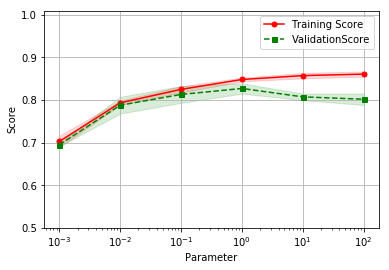

In [126]:
title='Validation'
param_name='C'
param_range=[.001,.01,.1,1,10,100]
cv=10
plot_validation_curve(estimator=logreg,title=title, X=X_train_poly_selected, y=y_train, param_name=param_name, ylim=(0.5,1.01), param_range=param_range);

In [127]:
df=pd.read_csv('C:\\Users\pragy\Desktop\downloads\\titanic\\test (1).csv')
df_raw=df.copy()

In [128]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  
df_raw['Title'] = df['Title']  
means = df_raw.groupby('Title')['Age'].mean()
map_means = means.to_dict()
idx_nan_age = df.loc[np.isnan(df['Age'])].index
df.loc[idx_nan_age, 'Age'] = df['Title'].loc[idx_nan_age].map(map_means)
df['Title'] = df['Title'].map(titles_dict)
df['Title'] = pd.Categorical(df['Title'])

df['Imputed'] = 0
df.at[idx_nan_age.values, 'Imputed'] = 1

df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])

## 2.3
passenger_id = df['PassengerId'].values
df.drop('PassengerId', axis=1, inplace=True)
df['Embarked'] = pd.Categorical(df['Embarked'])
df = pd.get_dummies(df)
df.drop(['Sex_female',
         'Age_Adult',
         'Embarked_C',
         'Title_Master'], axis=1, inplace=True)

df = df.fillna(df.mean())  # There is one missing value in 'Fare'

X = df[df.loc[:, df.columns != 'Survived'].columns]

X_transformed = X.copy()
X_transformed['Fare'] = boxcox(X_transformed['Fare'] + 1)[0]

scaler = MinMaxScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)

poly = PolynomialFeatures(degree=2).fit(X_transformed)
X_poly = poly.transform(X_transformed_scaled)

X_poly_selected = select.transform(X_poly)


In [129]:
predictions=logreg.predict(X_poly_selected)

In [130]:
submission = pd.DataFrame({ 'PassengerId': passenger_id,
                            'Survived': predictions})
submission.to_csv("C:\\Users\pragy\Desktop\downloads\\titanic\\submission.csv", index=False)